# Venn Diagram

This Jupyter Notebook provides the source used to create the Venn diagram that shows the contributions of papers.

## 1. Importing the libraries

In [1]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn3, venn3_circles

from utils import *

## 2. Reading the contribution and reference number of papers

Uses the utils module to load the stages of VM consolidation in which a paper has a contribution and the reference number of the paper. 

In [2]:
pmc, vms, vmp = DataExtraction().get_contribution_and_reference()

## 3. Computing the subsets

Define seven regions taking into account the intersections between the three sets (PMC, VMS, VMP).

In [3]:
subsets = {
    '100': sorted((pmc - vms) - vmp),
    '010': sorted((vms - pmc) - vmp),
    '001': sorted((vmp - pmc) - vms),
    '110': sorted((pmc & vms) - vmp),
    '101': sorted((pmc & vmp) - vms),
    '011': sorted((vms & vmp) - pmc),
    '111': sorted((pmc & vms) & vmp),
}

## 4. Defining the amount of items per line

Here we define the amount of papers per line in the label.

In [4]:
items_per_line = {
    '100': 4,
    '010': 2,
    '001': 6,
    '110': 3,
    '101': 3,
    '011': 2,
    '111': 3,
}

## 5. Defining the offsets

For each region, we define the offsets (in x and y axes) to the current position of the label.

In [5]:
offsets = {
    '100': (0.03, -0.03),
    '010': (-0.03, 0),
    '001': (-0.05, 0),
    '110': (0.02, -0.02),
    '101': (-0.05, 0),
    '011': (0.04, 0.04),
    '111': (0.025, 0.04),
}

## 6. Creating the Venn diagram

Uses the venn3 method from the matplotlib_venn package to plot create the Venn diagram.  
Change the label of the number of items per region to the elements themselves (reference number of the paper).

In [6]:
def plot_venn_diagram(subsets, items_per_line, offsets, outside_circles=True):
    figure = plt.figure(figsize=(10, 10))

    venn = venn3(subsets=(pmc, vms, vmp), set_labels = ('PMC', 'VMS', 'VMP'))

    x = 0
    y = 1

    for set_id in venn.id2idx.keys():
        label = venn.get_label_by_id(set_id)

        if set_id in {'A', 'B', 'C'}:
            label.set_fontsize(25)
        else:
            label.set_fontsize(16)

        try:    
            offset = offsets[set_id]
            position = label.get_position()
            label.set_text(format_string(str(subsets[set_id]), n=items_per_line[set_id]))
            label.set_position((position[x] + offset[x], position[y] + offset[y]))
        except:
            continue

    if outside_circles:   
        circles = venn3_circles(subsets=(pmc, vms, vmp), linestyle='dashed')
        for circle in circles:
            circle.set_lw(2.0)

    plt.show()
    figure.savefig(f'{OUTPUT_PATH}/DEF-VennDiagram.pdf', bbox_inches='tight')

## 7. Ploting the Venn diagram

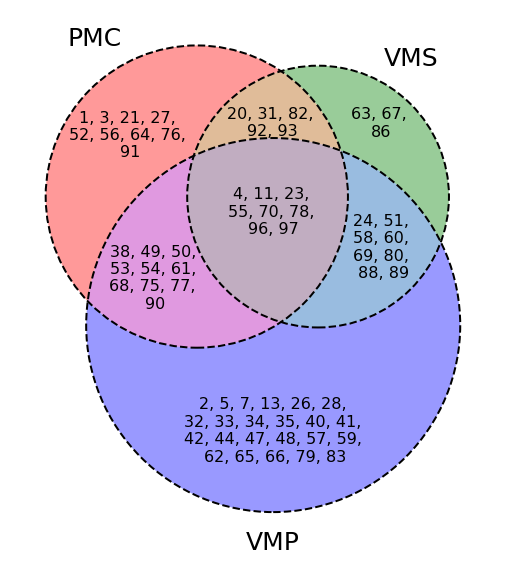

In [7]:
plot_venn_diagram(subsets, items_per_line, offsets)